# Fashion MINST dataset classification

In [1]:
# Importing necessary libraries
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading datasets

(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

In [3]:
print(ds_info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='C:\\Users\\Nikhil_Chamle\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07

In [4]:
ds_info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})

In [5]:
# Taking a few samples from the training dataset
for image, label in ds_train.take(5):
    print(f"Image shape: {image.shape}, Label: {label}")

Image shape: (28, 28, 1), Label: 2
Image shape: (28, 28, 1), Label: 1
Image shape: (28, 28, 1), Label: 8
Image shape: (28, 28, 1), Label: 4
Image shape: (28, 28, 1), Label: 1


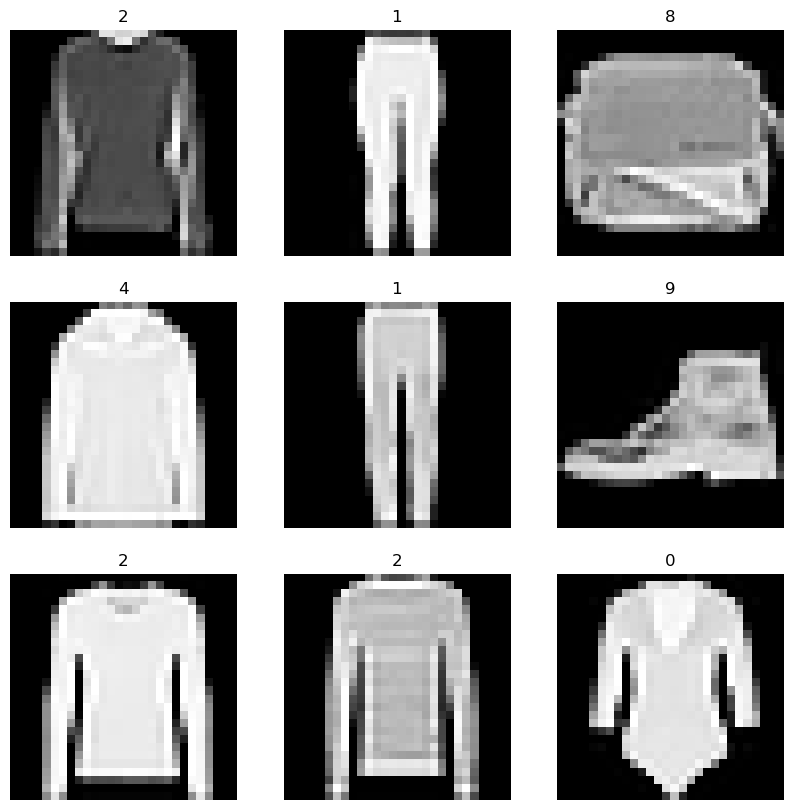

In [6]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy().reshape(28, 28), cmap='gray')
    plt.title(label.numpy())
    plt.axis('off')
plt.show()

In [7]:
#normalizing images
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.
    return image, label

ds_train = ds_train.map(normalize)
ds_test = ds_test.map(normalize)

In [8]:
#model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

C:\Users\Nikhil_Chamle\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [10]:
# Define EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [11]:
history = model.fit(
    ds_train.batch(32),
    epochs=50,
    validation_data=ds_test.batch(32)
)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7653 - loss: 0.6737 - val_accuracy: 0.8383 - val_loss: 0.4396
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8516 - loss: 0.4113 - val_accuracy: 0.8601 - val_loss: 0.3863
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8663 - loss: 0.3708 - val_accuracy: 0.8686 - val_loss: 0.3703
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8743 - loss: 0.3485 - val_accuracy: 0.8749 - val_loss: 0.3514
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8802 - loss: 0.3270 - val_accuracy: 0.8767 - val_loss: 0.3473
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8810 - loss: 0.3180 - val_accuracy: 0.8697 - val_loss: 0.3596
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8860 - loss: 0.3063 - val_accuracy: 0.8771 - val_loss: 0.3527
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8893 - loss: 0.2968 - 

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9350 - loss: 0.1689 - val_accuracy: 0.8856 - val_loss: 0.4377


In [12]:
# Evaluation
test_loss, test_acc = model.evaluate(ds_test.batch(32))
print(f'Test accuracy: {test_acc:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8915 - loss: 0.4175
Test accuracy: 0.89


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


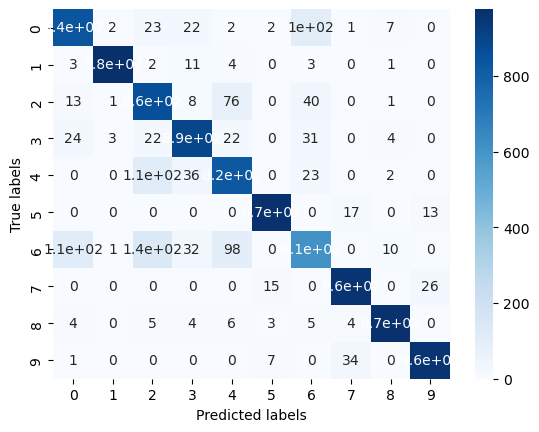

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


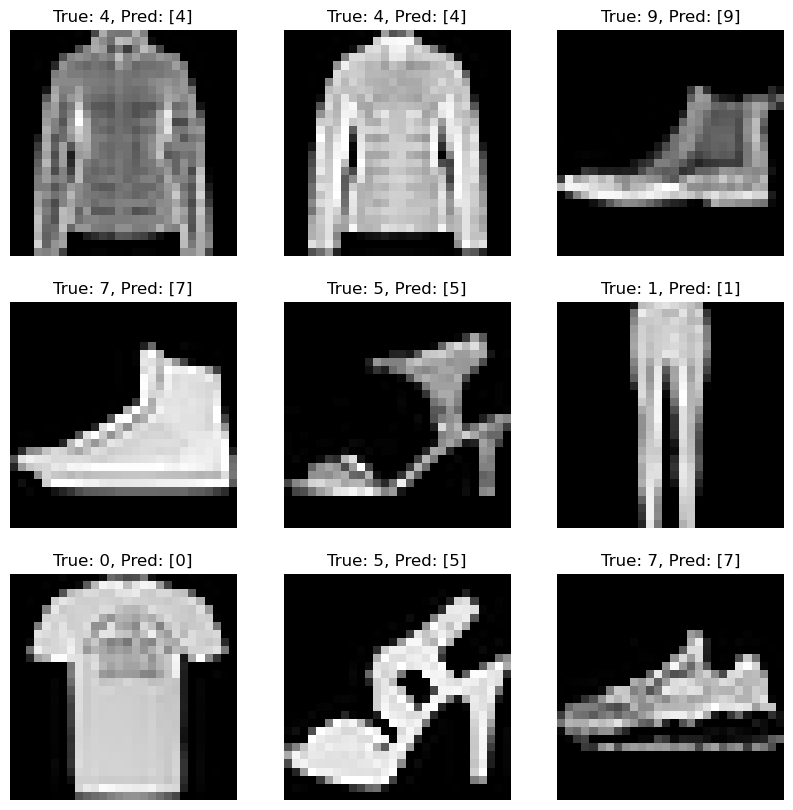

In [13]:
# Confusion matrix
test_labels = [label.numpy() for image, label in ds_test]
test_preds = model.predict(ds_test.batch(32))
test_preds = tf.argmax(test_preds, axis=1).numpy()
sns.heatmap(tf.math.confusion_matrix(test_labels, test_preds), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Example predictions
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_test.take(9)):
    plt.subplot(3, 3, i+1)
    plt.imshow(image.numpy().reshape(28, 28), cmap='gray')
    plt.title(f'True: {label.numpy()}, Pred: {tf.argmax(model.predict(image[None, ...]), axis=1).numpy()}')
    plt.axis('off')
plt.show()